In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/catcherr.csv')
## dropping index column that gets created

df.drop('Unnamed: 0', axis = 1, inplace = True)

df.head()

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,dropK,yacK,base,td_points,compilation
0,David Boston,1999.0,21.0,1-8,ARI,240.0,30.8,16.0,5.0,0.0,...,0.145161,0.139373,0.168748,0.181818,0.0,1.609438,31.985201,0.074346,0.159658,8.552186
1,Frank Sanders,1999.0,26.0,2-47,ARI,215.0,27.6,16.0,0.0,0.0,...,0.274194,0.275261,0.340350,0.090909,0.0,2.708050,70.315514,0.369168,0.039915,37.196235
2,Rob Moore,1999.0,31.0,1-1,ARI,203.0,25.4,14.0,0.0,0.0,...,0.172043,0.128920,0.221548,0.454545,0.0,1.386294,17.753623,0.128205,0.997865,19.805583
3,Mac Cody,1999.0,27.0,UDFA,ARI,182.0,25.4,13.0,0.0,0.0,...,0.019713,0.020906,0.021406,0.090909,0.0,0.000000,7.350000,0.002884,0.039915,0.567829
4,Frank Sanders,2000.0,27.0,2-47,ARI,215.0,27.6,16.0,0.0,0.0,...,0.209386,0.170886,0.230462,0.375000,1.0,2.484907,37.234980,0.235628,0.987886,30.478033


In [3]:
## creating a dataframe that only has rows of a players first 4 seasons in the league
## it also gets rid of any players who entered the league after 2012 because they
## will not have a 4th season yet for us to predict
df3 = df[(df.rookie_season <2013)& (df.years_in_league<=3)]
df3.head()

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,dropK,yacK,base,td_points,compilation
0,David Boston,1999.0,21.0,1-8,ARI,240.0,30.8,16.0,5.0,0.0,...,0.145161,0.139373,0.168748,0.181818,0.0,1.609438,31.985201,0.074346,0.159658,8.552186
1,Frank Sanders,1999.0,26.0,2-47,ARI,215.0,27.6,16.0,0.0,0.0,...,0.274194,0.275261,0.340350,0.090909,0.0,2.708050,70.315514,0.369168,0.039915,37.196235
2,Rob Moore,1999.0,31.0,1-1,ARI,203.0,25.4,14.0,0.0,0.0,...,0.172043,0.128920,0.221548,0.454545,0.0,1.386294,17.753623,0.128205,0.997865,19.805583
3,Mac Cody,1999.0,27.0,UDFA,ARI,182.0,25.4,13.0,0.0,0.0,...,0.019713,0.020906,0.021406,0.090909,0.0,0.000000,7.350000,0.002884,0.039915,0.567829
4,Frank Sanders,2000.0,27.0,2-47,ARI,215.0,27.6,16.0,0.0,0.0,...,0.209386,0.170886,0.230462,0.375000,1.0,2.484907,37.234980,0.235628,0.987886,30.478033


In [4]:
## I am creating a list of the columns where there are no null values in order to create
## my pivot table with it

cols_to_keep = []
for col in df3.columns:
    if df3[col].isnull().sum() == 0:
        cols_to_keep.append(col)
        
cols_to_keep.remove('years_in_league')
cols_to_keep.remove('team_pass_yds')
cols_to_keep.remove('team_pass_tds')
cols_to_keep.remove('team_pass_attempts')
cols_to_keep.remove('team_completions')
cols_to_keep.remove('total_points')
cols_to_keep.append('compilation')
print cols_to_keep

['name', 'season', 'age', 'draft_pos', 'team', 'weight', 'bmi', 'games', 'rush_atts', 'rush_yds', 'rush_y/a', 'rush_tds', 'rush_ypg', 'targets', 'receptions', 'rec_yards', 'yards/reception', 'rec_tds', 'rec_ypg', 'ctch_pct', 'y/tgt', 'fumbles', 'fumbles_recovered', 'fum_ret_yds', 'fum_tds', 'forced_fumbles', 'pro_bowls', 'all_pros', 'position', '100yd_gms', 'first_down_ctchs', 'first_down_ctchpct', 'long_ctch', 'drops', 'EYds', 'DVOA', 'DYAR', '40 Yard', 'rookie_age', 'rookie_season', 'height_inches', 'start_ratio', 'dpis_drawn', 'dpi_yards', 'pct_team_tgts', 'pct_team_receptions', 'pct_of_team_passyards', 'pct_team_touchdowns', 'dropK', 'yacK', 'td_points', 'compilation']


In [5]:
## creating a pivot table with columns that have no nulls in it and name as the index, with
## years in the league as the breakdown for columns

pivoted = df3.pivot_table(index=df3.name, columns='years_in_league', values=cols_to_keep)
print pivoted.shape
pivoted.head()

(898, 192)


season                           age                    \
years_in_league     0.0     1.0     2.0     3.0   0.0   1.0   2.0   3.0   
name                                                                      
A.J. Green       2011.0  2012.0  2013.0  2014.0  23.0  24.0  25.0  26.0   
A.J. Jenkins     2012.0  2013.0     NaN     NaN  23.0  24.0   NaN   NaN   
Aaron Brown      2009.0     NaN     NaN     NaN  24.0   NaN   NaN   NaN   
Aaron Halterman  2007.0     NaN     NaN     NaN  25.0   NaN   NaN   NaN   
Aaron Moorehead  2003.0  2004.0  2005.0  2006.0  23.0  24.0  25.0  26.0   

                weight           ...            yacK             td_points  \
years_in_league    0.0    1.0    ...             2.0         3.0       0.0   
name                             ...                                         
A.J. Green       205.0  205.0    ...      123.114306  118.348703  1.024475   
A.J. Jenkins     192.0  192.0    ...             NaN         NaN  0.000000   
Aaron Brown      196.0    NaN    ...             NaN         NaN  0.027441   
Aaron Halterman  255.0    NaN    ...             NaN         NaN  0.000000   
Aaron Moorehead  200.0  200.0    ...        4.320000    1.756098  0.000000   

                                              compilation             \
years_in_league       1.0       2.0       3.0         0.0        1.0   
name                                                                   
A.J. Green       1.897369  1.562539  0.790309   53.006410  98.471570   
A.J. Jenkins     0.000000       NaN       NaN         NaN   0.597268   
Aaron Brown           NaN       NaN       NaN    1.007213        NaN   
Aaron Halterman       NaN       NaN       NaN    0.030196        NaN   
Aaron Moorehead  0.000000  0.000000  0.012914    0.240777   0.025880   

                                       
years_in_league        2.0        3.0  
name                                   
A.J. Green       82.935491  59.741763  
A.J. Jenkins           NaN        NaN  
Aaron Brown            NaN        NaN  
Aaron Halterman        NaN        NaN  
Aaron Moorehead   0.222518   0.274562  

[5 rows x 192 columns]

In [6]:
zero_cols = ['games', 'rush_atts', 'rush_yds', 'rush_y/a', 'rush_tds', 'rush_ypg',
             'targets', 'receptions', 'rec_yards', 'yards/reception', 'rec_tds',
             'rec_ypg', 'ctch_pct', 'y/tgt', 'fumbles', 'fumbles_recovered', 'fum_ret_yds',
             'fum_tds', 'forced_fumbles', 'pro_bowls', 'all_pros', '100yd_gms',
             'first_down_ctchs', 'first_down_ctchpct', 'long_ctch', 'drops', 'EYds',
             'DVOA', 'DYAR', '40 Yard', 'start_ratio', 'dpis_drawn', 'dpi_yards',
             'pct_team_tgts', 'pct_team_receptions', 'pct_of_team_passyards',
             'pct_team_touchdowns', 'dropK', 'yacK', 'td_points', 'compilation']

add_cols = ['season', 'age']

backfill_cols = ['weight', 'bmi', 'rookie_age',
                 'rookie_season', 'height_inches']

team_cols = ['team_pass_tds', 'team_pass_yds', 'team_pass_attempts', 'team_completions',
             'total_points']

years = [0.0, 1.0, 2.0, 3.0]
back_years = [1.0, 2.0, 3.0]

In [7]:
for col in zero_cols:
    for i in years:
        pivoted[col][i].fillna(0, inplace = True)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
pivoted.head(10)

season                           age                    \
years_in_league      0.0     1.0     2.0     3.0   0.0   1.0   2.0   3.0   
name                                                                       
A.J. Green        2011.0  2012.0  2013.0  2014.0  23.0  24.0  25.0  26.0   
A.J. Jenkins      2012.0  2013.0     NaN     NaN  23.0  24.0   NaN   NaN   
Aaron Brown       2009.0     NaN     NaN     NaN  24.0   NaN   NaN   NaN   
Aaron Halterman   2007.0     NaN     NaN     NaN  25.0   NaN   NaN   NaN   
Aaron Moorehead   2003.0  2004.0  2005.0  2006.0  23.0  24.0  25.0  26.0   
Aaron Walker      2006.0     NaN     NaN     NaN  26.0   NaN   NaN   NaN   
Adam Jennings     2007.0     NaN  2009.0     NaN  25.0   NaN  27.0   NaN   
Adrian Arrington  2010.0  2011.0     NaN     NaN  25.0  26.0   NaN   NaN   
Adrian Madise     2003.0     NaN     NaN     NaN  23.0   NaN   NaN   NaN   
Ahmad Merritt     2001.0  2002.0  2003.0     NaN  24.0  25.0  26.0   NaN   

                 weight           ...            yacK             td_points  \
years_in_league     0.0    1.0    ...             2.0         3.0       0.0   
name                              ...                                         
A.J. Green        205.0  205.0    ...      123.114306  118.348703  1.024475   
A.J. Jenkins      192.0  192.0    ...        0.000000    0.000000  0.000000   
Aaron Brown       196.0    NaN    ...        0.000000    0.000000  0.027441   
Aaron Halterman   255.0    NaN    ...        0.000000    0.000000  0.000000   
Aaron Moorehead   200.0  200.0    ...        4.320000    1.756098  0.000000   
Aaron Walker      252.0    NaN    ...        0.000000    0.000000  0.000000   
Adam Jennings     181.0    NaN    ...        0.000000    0.000000  0.024392   
Adrian Arrington  185.0  185.0    ...        0.000000    0.000000  0.000000   
Adrian Madise     215.0    NaN    ...        0.000000    0.000000  0.000000   
Ahmad Merritt     195.0  195.0    ...        3.380000    0.000000  0.000000   

                                               compilation             \
years_in_league        1.0       2.0       3.0         0.0        1.0   
name                                                                    
A.J. Green        1.897369  1.562539  0.790309   53.006410  98.471570   
A.J. Jenkins      0.000000  0.000000  0.000000    0.000000   0.597268   
Aaron Brown       0.000000  0.000000  0.000000    1.007213   0.000000   
Aaron Halterman   0.000000  0.000000  0.000000    0.030196   0.000000   
Aaron Moorehead   0.000000  0.000000  0.012914    0.240777   0.025880   
Aaron Walker      0.000000  0.000000  0.000000    0.412599   0.000000   
Adam Jennings     0.000000  0.000000  0.000000    0.585068   0.000000   
Adrian Arrington  0.000000  0.000000  0.000000    0.268449   0.066052   
Adrian Madise     0.000000  0.000000  0.000000    0.036275   0.000000   
Ahmad Merritt     0.000000  0.000000  0.000000    0.047423   0.258573   

                                        
years_in_league         2.0        3.0  
name                                    
A.J. Green        82.935491  59.741763  
A.J. Jenkins       0.000000   0.000000  
Aaron Brown        0.000000   0.000000  
Aaron Halterman    0.000000   0.000000  
Aaron Moorehead    0.222518   0.274562  
Aaron Walker       0.000000   0.000000  
Adam Jennings      0.000000   0.000000  
Adrian Arrington   0.000000   0.000000  
Adrian Madise      0.000000   0.000000  
Ahmad Merritt      0.054774   0.000000  

[10 rows x 192 columns]

In [9]:
for col in backfill_cols:
    for i in back_years:
        pivoted[col][i] = pivoted[col][0.0]

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
pivoted = pivoted[pivoted.season[0.0].isnull() == False]

In [11]:
for i in pivoted:
    print i
    print pivoted[i].isnull().sum()
    print '================='



('season', 0.0)
0
('season', 1.0)
380
('season', 2.0)
479
('season', 3.0)
562
('age', 0.0)
0
('age', 1.0)
380
('age', 2.0)
479
('age', 3.0)
562
('weight', 0.0)
0
('weight', 1.0)
0
('weight', 2.0)
0
('weight', 3.0)
0
('bmi', 0.0)
0
('bmi', 1.0)
0
('bmi', 2.0)
0
('bmi', 3.0)
0
('games', 0.0)
0
('games', 1.0)
0
('games', 2.0)
0
('games', 3.0)
0
('rush_atts', 0.0)
0
('rush_atts', 1.0)
0
('rush_atts', 2.0)
0
('rush_atts', 3.0)
0
('rush_yds', 0.0)
0
('rush_yds', 1.0)
0
('rush_yds', 2.0)
0
('rush_yds', 3.0)
0
('rush_y/a', 0.0)
0
('rush_y/a', 1.0)
0
('rush_y/a', 2.0)
0
('rush_y/a', 3.0)
0
('rush_tds', 0.0)
0
('rush_tds', 1.0)
0
('rush_tds', 2.0)
0
('rush_tds', 3.0)
0
('rush_ypg', 0.0)
0
('rush_ypg', 1.0)
0
('rush_ypg', 2.0)
0
('rush_ypg', 3.0)
0
('targets', 0.0)
0
('targets', 1.0)
0
('targets', 2.0)
0
('targets', 3.0)
0
('receptions', 0.0)
0
('receptions', 1.0)
0
('receptions', 2.0)
0
('receptions', 3.0)
0
('rec_yards', 0.0)
0
('rec_yards', 1.0)
0
('rec_yards', 2.0)
0
('rec_yards', 3.0)
0
('ya

In [12]:
## creating a variable made of the multiindexed columns

mi = pivoted.columns

In [13]:
## I am now creating a new set of column names made up of the upper index and the lower
## index added together
new_cols = pd.Index([x[0]+'_'+str(x[1]) for x in mi.tolist()])
new_cols

Index([u'season_0.0', u'season_1.0', u'season_2.0', u'season_3.0', u'age_0.0',
       u'age_1.0', u'age_2.0', u'age_3.0', u'weight_0.0', u'weight_1.0',
       ...
       u'yacK_2.0', u'yacK_3.0', u'td_points_0.0', u'td_points_1.0',
       u'td_points_2.0', u'td_points_3.0', u'compilation_0.0',
       u'compilation_1.0', u'compilation_2.0', u'compilation_3.0'],
      dtype='object', length=192)

In [14]:
## I will now be renaming the pivoted dataframe columns my new_cols list which is a combination
## of the two levels of column names from when we initially pivoted

pivoted.columns = new_cols
print pivoted.columns
pivoted.head()

Index([u'season_0.0', u'season_1.0', u'season_2.0', u'season_3.0', u'age_0.0',
       u'age_1.0', u'age_2.0', u'age_3.0', u'weight_0.0', u'weight_1.0',
       ...
       u'yacK_2.0', u'yacK_3.0', u'td_points_0.0', u'td_points_1.0',
       u'td_points_2.0', u'td_points_3.0', u'compilation_0.0',
       u'compilation_1.0', u'compilation_2.0', u'compilation_3.0'],
      dtype='object', length=192)


,season_0.0,season_1.0,season_2.0,season_3.0,age_0.0,age_1.0,age_2.0,age_3.0,weight_0.0,weight_1.0,...,yacK_2.0,yacK_3.0,td_points_0.0,td_points_1.0,td_points_2.0,td_points_3.0,compilation_0.0,compilation_1.0,compilation_2.0,compilation_3.0
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,2011.0,2012.0,2013.0,2014.0,23.0,24.0,25.0,26.0,205.0,205.0,...,123.114306,118.348703,1.024475,1.897369,1.562539,0.790309,53.006410,98.471570,82.935491,59.741763
A.J. Jenkins,2012.0,2013.0,NaN,NaN,23.0,24.0,NaN,NaN,192.0,192.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597268,0.000000,0.000000
Aaron Brown,2009.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,196.0,196.0,...,0.000000,0.000000,0.027441,0.000000,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000
Aaron Halterman,2007.0,NaN,NaN,NaN,25.0,NaN,NaN,NaN,255.0,255.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000
Aaron Moorehead,2003.0,2004.0,2005.0,2006.0,23.0,24.0,25.0,26.0,200.0,200.0,...,4.320000,1.756098,0.000000,0.000000,0.000000,0.012914,0.240777,0.025880,0.222518,0.274562


In [15]:
## this is simply to get rid of the '.0' at the end of every column name

pivoted.rename(columns = lambda x: x.replace('.0', ''), inplace = True)
pivoted.head()

,season_0,season_1,season_2,season_3,age_0,age_1,age_2,age_3,weight_0,weight_1,...,yacK_2,yacK_3,td_points_0,td_points_1,td_points_2,td_points_3,compilation_0,compilation_1,compilation_2,compilation_3
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,2011.0,2012.0,2013.0,2014.0,23.0,24.0,25.0,26.0,205.0,205.0,...,123.114306,118.348703,1.024475,1.897369,1.562539,0.790309,53.006410,98.471570,82.935491,59.741763
A.J. Jenkins,2012.0,2013.0,NaN,NaN,23.0,24.0,NaN,NaN,192.0,192.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597268,0.000000,0.000000
Aaron Brown,2009.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,196.0,196.0,...,0.000000,0.000000,0.027441,0.000000,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000
Aaron Halterman,2007.0,NaN,NaN,NaN,25.0,NaN,NaN,NaN,255.0,255.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000
Aaron Moorehead,2003.0,2004.0,2005.0,2006.0,23.0,24.0,25.0,26.0,200.0,200.0,...,4.320000,1.756098,0.000000,0.000000,0.000000,0.012914,0.240777,0.025880,0.222518,0.274562


In [16]:
pivoted['season_1'] = pivoted['season_0']+1
pivoted['season_2'] = pivoted['season_0']+2
pivoted['season_3'] = pivoted['season_0']+3

In [17]:
pivoted.head()
for col in pivoted.columns:
    if col == 'compilation_3':
        pass
    elif str(col)[-2:] =='_3':
        pivoted.drop(col, axis=1, inplace=True)

In [18]:
pivoted.head()

,season_0,season_1,season_2,age_0,age_1,age_2,weight_0,weight_1,weight_2,bmi_0,...,yacK_0,yacK_1,yacK_2,td_points_0,td_points_1,td_points_2,compilation_0,compilation_1,compilation_2,compilation_3
name,,,,,,,,,,,,,,,,,,,,,
A.J. Green,2011.0,2012.0,2013.0,23.0,24.0,25.0,205.0,205.0,205.0,25.0,...,81.219489,139.522963,123.114306,1.024475,1.897369,1.562539,53.006410,98.471570,82.935491,59.741763
A.J. Jenkins,2012.0,2013.0,2014.0,23.0,24.0,NaN,192.0,192.0,192.0,26.0,...,0.000000,16.276923,0.000000,0.000000,0.000000,0.000000,0.000000,0.597268,0.000000,0.000000
Aaron Brown,2009.0,2010.0,2011.0,24.0,NaN,NaN,196.0,196.0,196.0,26.6,...,84.000000,0.000000,0.000000,0.027441,0.000000,0.000000,1.007213,0.000000,0.000000,0.000000
Aaron Halterman,2007.0,2008.0,2009.0,25.0,NaN,NaN,255.0,255.0,255.0,30.2,...,1.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.030196,0.000000,0.000000,0.000000
Aaron Moorehead,2003.0,2004.0,2005.0,23.0,24.0,25.0,200.0,200.0,200.0,25.0,...,2.534653,1.285714,4.320000,0.000000,0.000000,0.000000,0.240777,0.025880,0.222518,0.274562


In [19]:
pivoted['age_1'] = pivoted['age_0']+1
pivoted['age_2'] = pivoted['age_0']+2
#pivoted['age_3'] = pivoted['age_0']+3

In [20]:
pivoted.head()
pivoted.columns

Index([u'season_0', u'season_1', u'season_2', u'age_0', u'age_1', u'age_2',
       u'weight_0', u'weight_1', u'weight_2', u'bmi_0',
       ...
       u'yacK_0', u'yacK_1', u'yacK_2', u'td_points_0', u'td_points_1',
       u'td_points_2', u'compilation_0', u'compilation_1', u'compilation_2',
       u'compilation_3'],
      dtype='object', length=145)

In [30]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest

X = pivoted.drop(['compilation_3', 'compilation_0', 'compilation_1', 'compilation_2'], axis = 1)
y = pivoted['compilation_3']

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

model = lr.fit(X_train, y_train)

In [29]:
model.score(X_test, y_test)


0.0023176702016212136

In [31]:

kbest = SelectKBest(k=50)
kbest.fit(X,y)
# Show the feature importance for Kbest of 30
kbest_importance = pd.DataFrame(zip(X.columns, kbest.get_support()), columns = ['feature', 'important?'])

kbest_features = kbest_importance[kbest_importance['important?'] == True].feature
#Here's our dataframe
X_model = X[kbest_features]

In [32]:
kbest_importance

,feature,important?
0,season_0,False
1,season_1,False
2,season_2,False
3,age_0,False
4,age_1,False
5,age_2,False
6,weight_0,False
7,weight_1,False
8,weight_2,False
9,bmi_0,False


In [78]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(lr, X_model, y, cv = 5)
scores.mean()

0.17887759973776324

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
knr = KNeighborsRegressor(n_neighbors = 30)


scaled_X = scale(X_model)
scaled_y = scale(y)

knr_fit = knr.fit(scaled_X, scaled_y)
y_pred = knr_fit.predict(scaled_X)
print knr_fit.score(scaled_X, scaled_y)
knr_scores = cross_val_score(knr, scaled_X, scaled_y, cv = 5)
print knr_scores.mean()

0.435017205188
0.382849992089


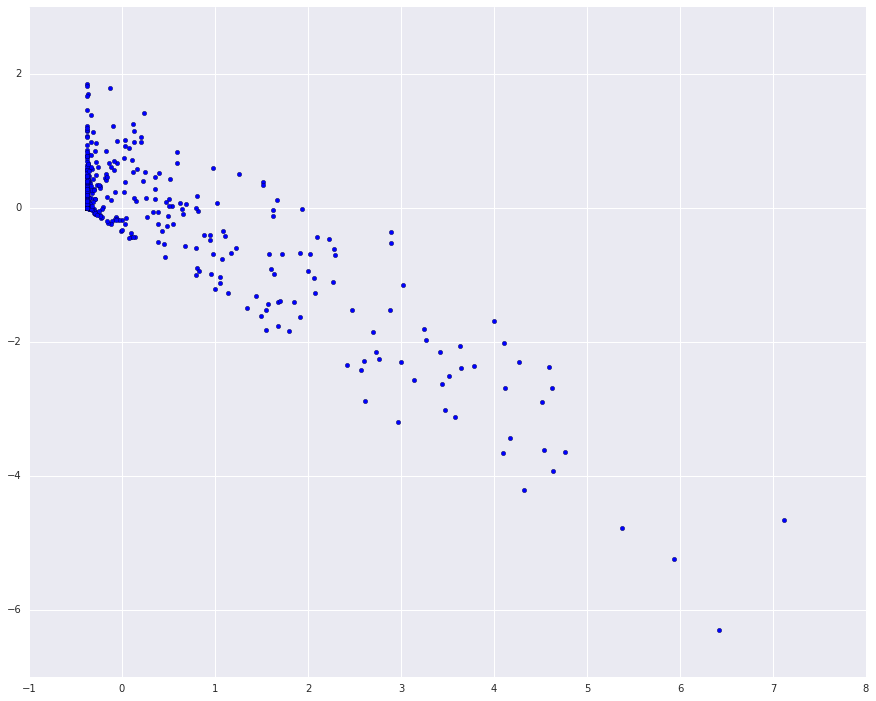

In [86]:
plt.figure(figsize = (15, 12))
plt.scatter(scaled_y, y_pred-scaled_y)

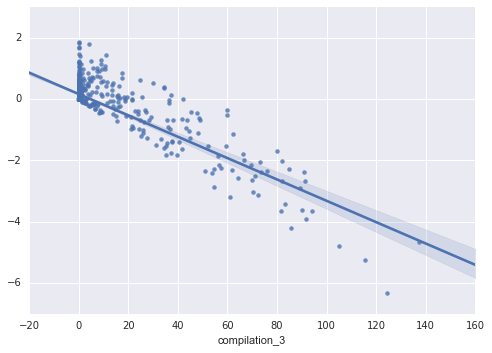

In [87]:
import seaborn as sns
sns.regplot(y, y_pred-scaled_y)